## **Import Libraries**

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

## **Training Samples**

In [53]:
X = np.array([[1   , 0.7 , 0.1 ],
              [1   , 1   , 1   ],
              [0.25, 0.95, 0.9 ],
              [0.1 , 0.95, 0.85],
              [0.87, 0   , 0.1 ],
              [0.82, 0.2 , 0.14],
              [0.8 , 0.2 , 0.2 ],
              [0   , 0.85, 1   ],
              [1   , 0   , 0   ],
              [0.17, 1   , 0.8 ],
              [0.9 , 0.1 , 0.1 ],
              [0.85, 0.2 , 0.2 ],
              [0.2 , 0.9 , 0.8 ],
              [0.3 , 0.9 , 0.9 ],
              [0   , 1   , 1   ],
              [0.1 , 0.85, 0.9 ],
              [0.92, 0.15, 0.1 ],
              [1   , 0.13, 0.2 ]])
X.shape

(18, 3)

In [54]:
Y = np.array([[0],
              [1],
              [1],
              [1],
              [0],
              [0],
              [0],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1],
              [1],
              [1],
              [1],
              [0],
              [0]])
Y.shape

(18, 1)

## **Plot Data in 3D**

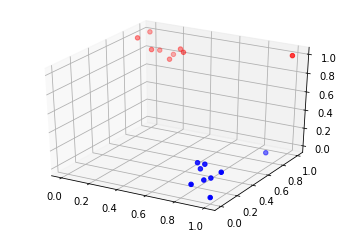

In [55]:
##### Plot Samples in 3D #####
fig = plt.figure()
colors = np.where(Y == 1, 'red', 'blue').flatten()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], c=colors)
plt.show()

## **LVQ1 Model Implementation From Scratch**

In [63]:
##### Implement your LVQ1 model here#####

class LVQ:

  def __init__(self, epochs, alpha):
    self.epochs = epochs
    self.alpha = alpha

  def min_distance(self, test_case, prototypes):
    dis = list()
    for i in prototypes:
      dis.append(np.linalg.norm(test_case - i))
    return np.argmin(dis), min(dis)  
  
  def train(self, X, Y):
    # initialize prototypes with the first two training samples 
    prototypes = np.array([X[0], X[1]])
    prototypes_label = np.array([Y[0], Y[1]])
    # repeat until stop condition met
    for i in range(self.epochs):
      rate = self.alpha * (1.0-(i/float(self.epochs)))
      # repeat for each trainging sample
      for x, y  in zip(X, Y):
        # find winner prototype
        bmu_index, distance = self.min_distance(x, prototypes)
        bmu = prototypes[bmu_index]
        bmu_label = prototypes_label[bmu_index]
        # print(f'epoche = {i} -- error = {np.subtract(x, bmu)} --- lr = {rate}')
        # update winner prototype 
        if bmu_label == y:
          prototypes[bmu_index] = np.add(prototypes[bmu_index], np.subtract(x, bmu)*rate)
        else:
          prototypes[bmu_index] = np.add(prototypes[bmu_index], -1*np.subtract(x, bmu)*rate)
    return prototypes

## **Train Model**

In [65]:
my_lvq = LVQ(10, 0.03)
protos = my_lvq.train(X, Y)

print(f'trained prototyps = {protos}')
print(f'raw prototyps = {X[:2]}')

trained prototyps = [[0.92799398 0.29818043 0.1213895 ]
 [0.4002423  0.94741902 0.9263312 ]]
raw prototyps = [[1.  0.7 0.1]
 [1.  1.  1. ]]


## **Plot Data in 3D**

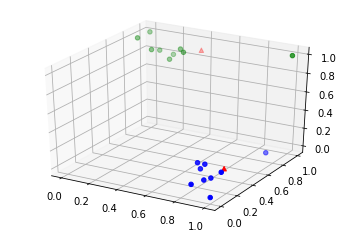

In [74]:
##### Plot Samples Again To Observe The Changes In Prototypes After Training #####
fig = plt.figure()
colors = np.where(Y == 1, 'green', 'blue').flatten()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], c=colors)
ax.scatter3D(protos[:,0], protos[:,1], protos[:,2], c={'red'}, marker='^')
plt.show()

## **Test Model**

In [75]:
##### Test The Model With The Given Sample #####

test_sample = np.array([[0.19, 0.93, 0.88]])

predict_idx, distance = my_lvq.min_distance(test_sample, protos)

print(predict_idx)

1


As it can be seen from the result the sample data belongs to class 1. lets check it in the plot. 

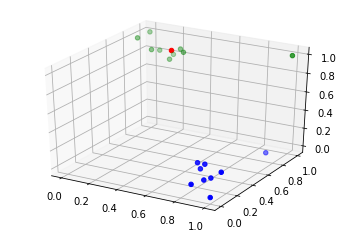

In [81]:
fig = plt.figure()
colors = np.where(Y == 1, 'green', 'blue').flatten()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], c=colors)
ax.scatter3D(test_sample[0][0], test_sample[0][1], test_sample[0][2], c='red')
plt.show()

From the plot it can easily be understood that our prediction was indeed correct since we marked class 1 data in green and the test_sample in red.